## POE5 Ch4: Prediction, Goodness-of-Fit, and Modeling Issues

### POE5 Example 4.1: Prediction in the Food Expenditure Model

NOTE: This is really rough - need to clean up for publication

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set(font_scale=1.3)


df = pd.read_excel('food.xlsx')
df['const'] = 1.

reg = sm.OLS(endog=df['food_exp'],exog=df[['const','income']])
res = reg.fit()

# Predicted yhat for income = $2000
yhat0 = res.params.const + res.params.income * 20  
print(f"Predicted food_exp for income=$2000: ${yhat0:.2f}")

# 95% prediction interval (we may want to clean this up some!)
tc975 = t.ppf(0.975,res.df_resid)  # Note: Gives 2.024 
var = res.ssr / res.df_resid     # sum of squared residuals / deg of freedom
var_b2 = res.bse.income**2
var_f = var + var/40 + (20-np.mean(df.income))**2*var_b2
print(var_f)
food_exp0_hat_u = yhat0 + tc975*np.sqrt(var_f)
food_exp0_hat_l = yhat0 - tc975*np.sqrt(var_f)
print(food_exp0_hat_l,food_exp0_hat_u)         # agrees with gretl output

Predicted food_exp for income=$2000: $287.61
8214.31098177984
104.13227683828205 471.08544592801644


In [2]:
# Here's another way to get the predicted values

new_data = pd.DataFrame({"const":[1],"income":[20]})
new_data = np.array([1,20])
#new_data = sm.add_constant(new_data)
print(new_data)
result = res.predict(new_data)
print(f"res = {result[0]:.2f}")


[ 1 20]
res = 287.61


### Example 4.2 in POE5


In [3]:
print(res.summary2())   # Generates R^2  

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.369   
Dependent Variable: food_exp         AIC:                475.0176
Date:               2020-02-25 20:04 BIC:                478.3954
No. Observations:   40               Log-Likelihood:     -235.51 
Df Model:           1                F-statistic:        23.79   
Df Residuals:       38               Prob (F-statistic): 1.95e-05
R-squared:          0.385            Scale:              8013.3  
-------------------------------------------------------------------
           Coef.    Std.Err.     t      P>|t|     [0.025    0.975] 
-------------------------------------------------------------------
const     83.4160    43.4102   1.9216   0.0622   -4.4633   171.2953
income    10.2096     2.0933   4.8774   0.0000    5.9721    14.4472
-----------------------------------------------------------------
Omnibus:               0.277        Durbin-Watson:          1.894
Prob(Omnibus):   

### Example 4.3 in POE5:  Reporting results

NOTE: Asli will need to decide if this goes in.

In [4]:
print(res.ssr)   # SSE unesplained

304505.175826731


## POE Example 4.4 Using the Linear-log Model for Food Expenditure

In [5]:
df = pd.read_excel('food.xlsx')

df['lincome'] = np.log(df.income)
df['const'] = 1

reg_log = sm.OLS(endog=df['food_exp'],exog=df[['const','lincome']])
res_log = reg_log.fit()

print(res_log.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.340   
Dependent Variable: food_exp         AIC:                476.8291
Date:               2020-02-25 20:04 BIC:                480.2069
No. Observations:   40               Log-Likelihood:     -236.41 
Df Model:           1                F-statistic:        21.05   
Df Residuals:       38               Prob (F-statistic): 4.76e-05
R-squared:          0.357            Scale:              8384.5  
------------------------------------------------------------------
           Coef.    Std.Err.     t     P>|t|     [0.025    0.975] 
------------------------------------------------------------------
const     -97.1864   84.2374  -1.1537  0.2558  -267.7162   73.3434
lincome   132.1658   28.8046   4.5884  0.0000    73.8540  190.4777
-----------------------------------------------------------------
Omnibus:              0.728        Durbin-Watson:           1.837
Prob(Omnibus):        

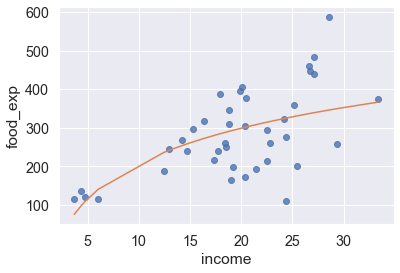

In [6]:
ax = sns.regplot(df.income,df.food_exp,fit_reg=False)
ax.plot(df.income,res_log.predict())

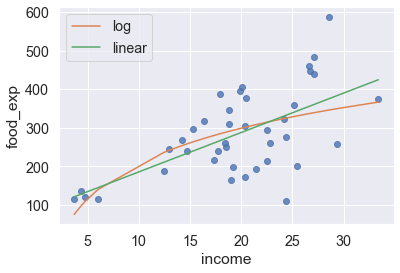

In [7]:
reg_lin = sm.OLS(endog=df['food_exp'],exog=df[['const','income']])
res_lin = reg.fit()

ax = sns.regplot(df.income,df.food_exp,fit_reg=False)
ax.plot(df.income,res_log.predict(),label='log')
ax.plot(df.income,res_lin.predict(),label='linear')
ax.legend()

## POE5 Example 4.5 Heteroskedasticity in the Food Expenditure Model

Text(0, 0.5, 'Residuals')

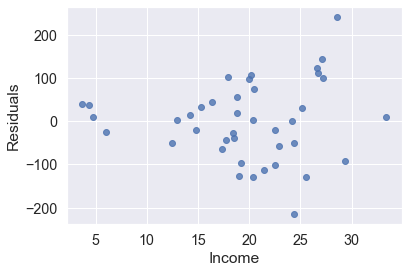

In [8]:
# Now let's plot residuals
predict = res_lin.predict()
df['resid_log'] = df.food_exp - res_log.predict()
df['resid_lin'] = df.food_exp - res_lin.predict()
ax = sns.regplot(df.income,df.resid_log,fit_reg=False)
ax.set_xlabel('Income')
ax.set_ylabel('Residuals')

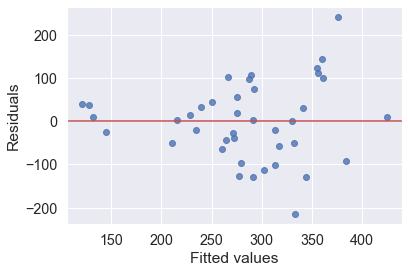

In [9]:
# Residuals vs. Fitted values
ax = sns.regplot(predict,df.resid_log,fit_reg=False)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.axhline(c='r')    # plot red horizontal line at y = 0

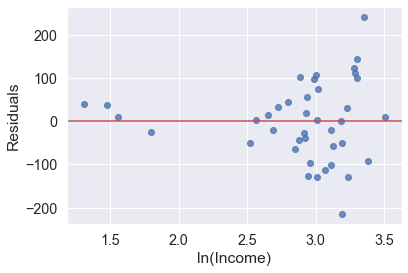

In [10]:
# Residuals vs. Predictor
ax = sns.regplot(df.lincome,df.resid_log,fit_reg=False)
ax.set_xlabel('ln(Income)')
ax.set_ylabel('Residuals')
ax.axhline(c='r')    # plot red horizontal line at y = 0

Text(0, 0.5, 'Relative Frequency')

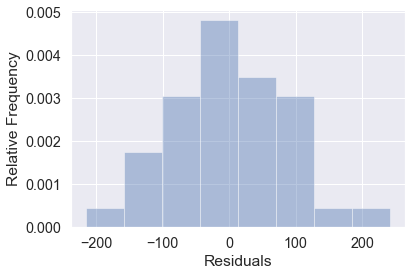

In [11]:
ax = sns.distplot(df.resid_log,kde=False,norm_hist=True)
ax.set_xlabel('Residuals')
ax.set_ylabel('Relative Frequency')

Text(0, 0.5, 'Relative Frequency')

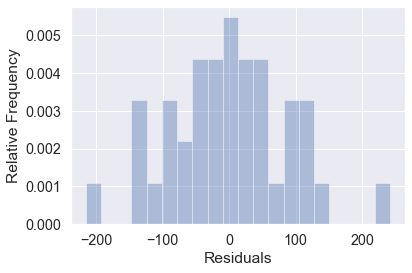

In [12]:
# Same data but with more bins
ax = sns.distplot(df.resid_log,kde=False,norm_hist=True,bins=20)
ax.set_xlabel('Residuals')
ax.set_ylabel('Relative Frequency')

## POE5 Example 4.6 Testing Normality in the Food Expenditure Data

In [13]:
df.resid_lin.describe()

count    4.000000e+01
mean    -2.700062e-14
std      8.836190e+01
min     -2.230255e+02
25%     -5.081567e+01
50%     -6.324473e+00
75%      6.787862e+01
max      2.120440e+02
Name: resid_lin, dtype: float64

---
### Jacque-Bera test:

This is returned by the summary2() method.  Result is 0.063 (see above) which agrees with STATA result.

---

In [14]:
from scipy.stats import chi2
print(f"Chi-squre(2) 95th percentile: {chi2.ppf(0.95, 2):.2f}")

Chi-squre(2) 95th percentile: 5.99


In [15]:
from statsmodels.stats.stattools import jarque_bera
jb, jbpv, skew, kurt = jarque_bera(df.resid_lin)
print(f"Jarque-Bera Statistic = {jb:.3f}")
print(f"Jarque-Bera p-value = {jbpv:.3f}")
print(f"Skewness = {skew:.3f}")
print(f"Kurtosis = {kurt:.3f}")

Jarque-Bera Statistic = 0.063
Jarque-Bera p-value = 0.969
Skewness = -0.097
Kurtosis = 2.989


---
### POE Example 4.7: Influential Observations in the Food Expenditure Data

---

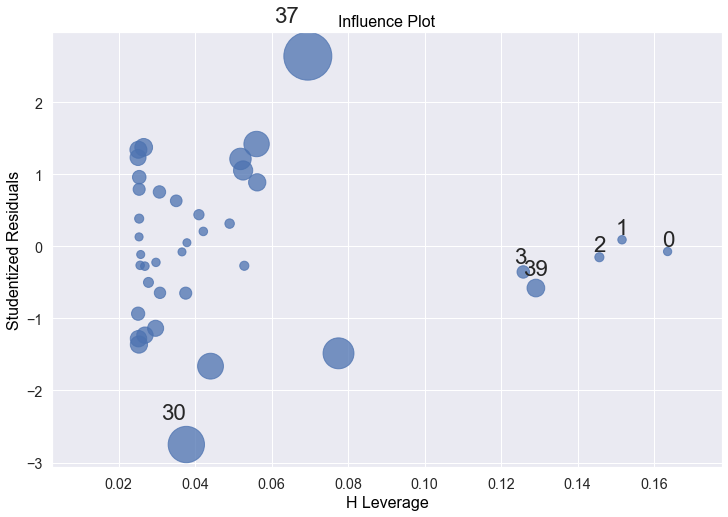

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(res, ax=ax)